In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point

In [5]:
df = pd.read_csv("./data-2014-2021-wo-missing.csv")

In [7]:
df

,id,year,month,day_of_week,lon,lat,vehicle_mass,Seriousness
0,6425463,2014,7,Sunnuntai,22.3570,60.4424,1165.0,Ei henkilövahinkoja
1,6425463,2014,7,Sunnuntai,22.3570,60.4424,NaN,Ei henkilövahinkoja
2,6425467,2014,12,Torstai,24.4156,60.9893,NaN,Ei henkilövahinkoja
3,6425467,2014,12,Torstai,24.4156,60.9893,1520.0,Ei henkilövahinkoja
4,6425473,2014,8,Lauantai,25.6635,60.9918,915.0,Ei henkilövahinkoja
...,...,...,...,...,...,...,...,...
247097,10220823,2021,12,Lauantai,21.7922,60.8418,17720.0,Ei henkilövahinkoja
247098,10220824,2021,12,Perjantai,23.7254,61.8770,1841.0,Ei henkilövahinkoja
247099,10220824,2021,12,Perjantai,23.7254,61.8770,12120.0,Ei henkilövahinkoja
247100,10220825,2021,12,Maanantai,27.2994,66.4834,2795.0,Ei henkilövahinkoja


In [9]:
df.lon[:10]

0    22.3570
1    22.3570
2    24.4156
3    24.4156
4    25.6635
5    25.6635
6    25.5430
7    25.5430
8    23.7701
9    27.2736
Name: lon, dtype: float64

In [10]:
df.lat[:10]

0    60.4424
1    60.4424
2    60.9893
3    60.9893
4    60.9918
5    60.9918
6    62.0222
7    62.0222
8    61.4942
9    61.6860
Name: lat, dtype: float64

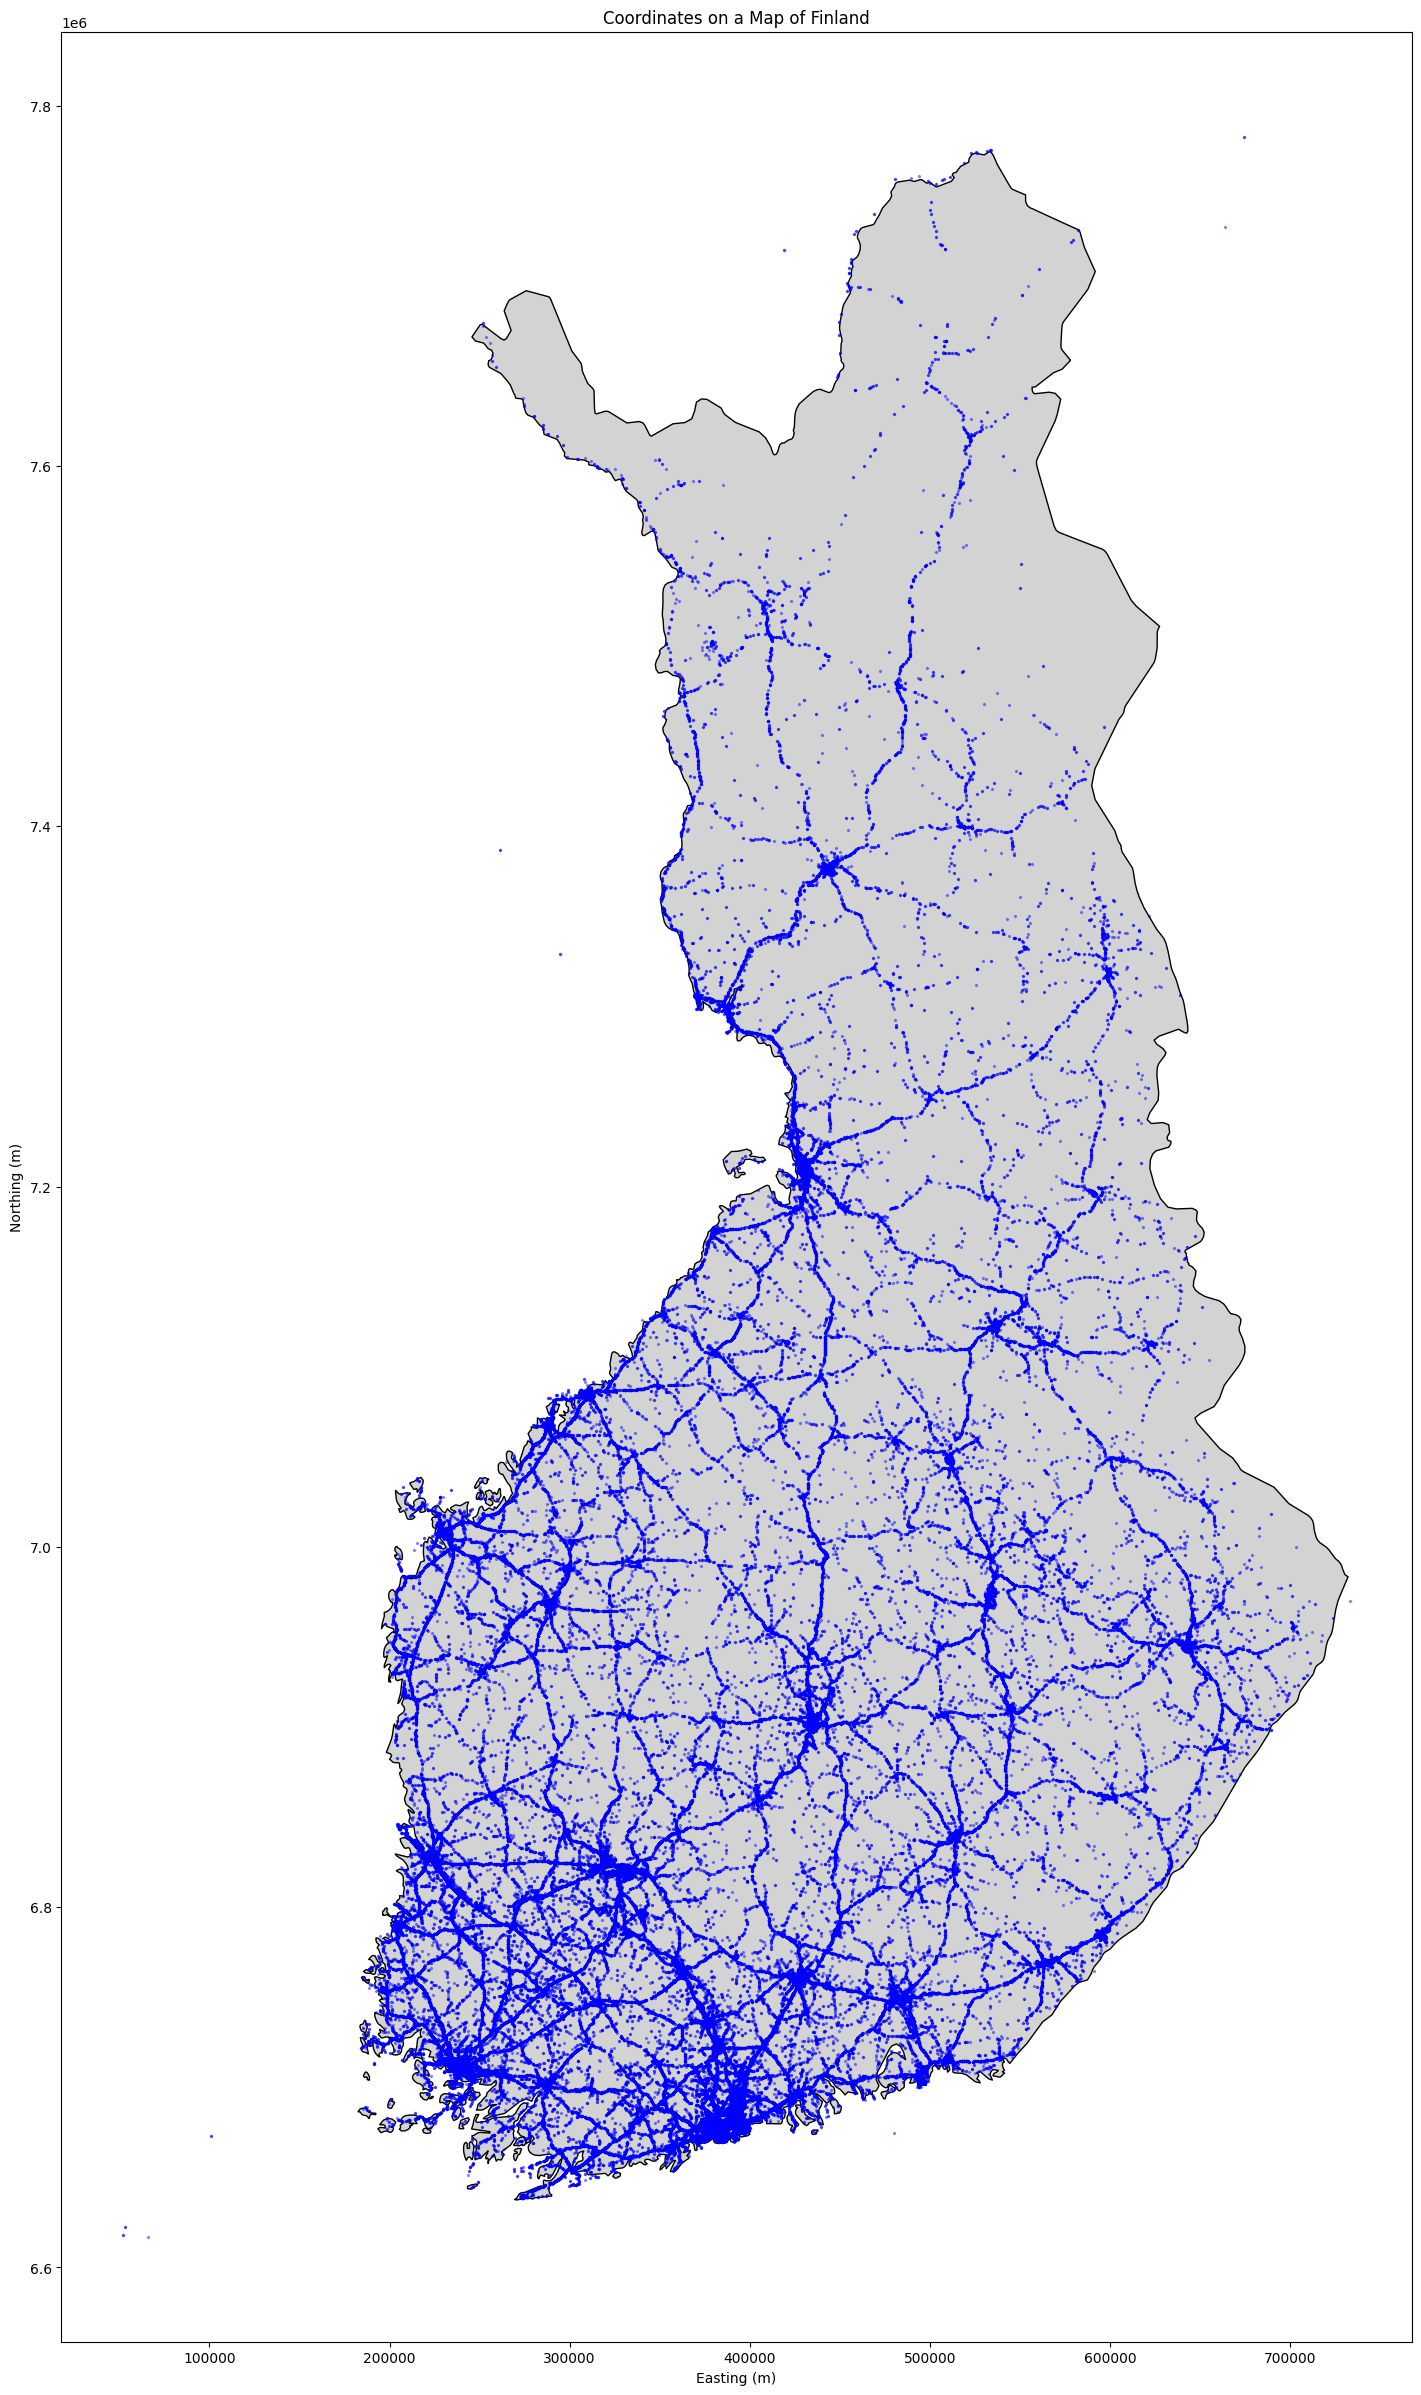

In [40]:
world = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
finland = world[world['ADMIN'] == 'Finland']

target_crs = 'EPSG:3067'

finland = finland.to_crs(target_crs)

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')

gdf = gdf.to_crs(target_crs)

fig, ax = plt.subplots(1, 1, figsize=(30, 30))

finland.plot(ax=ax, color='lightgray', edgecolor='black')

gdf.plot(ax=ax, marker='x', color='blue', markersize=2, zorder=5, alpha=0.5)

for x, y in zip(gdf.geometry.x, gdf.geometry.y):
    ax.text(x, y, "", fontsize=12, ha='right', va='top', fontweight='bold')

ax.set_title("Coordinates on a Map of Finland")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")

plt.show()

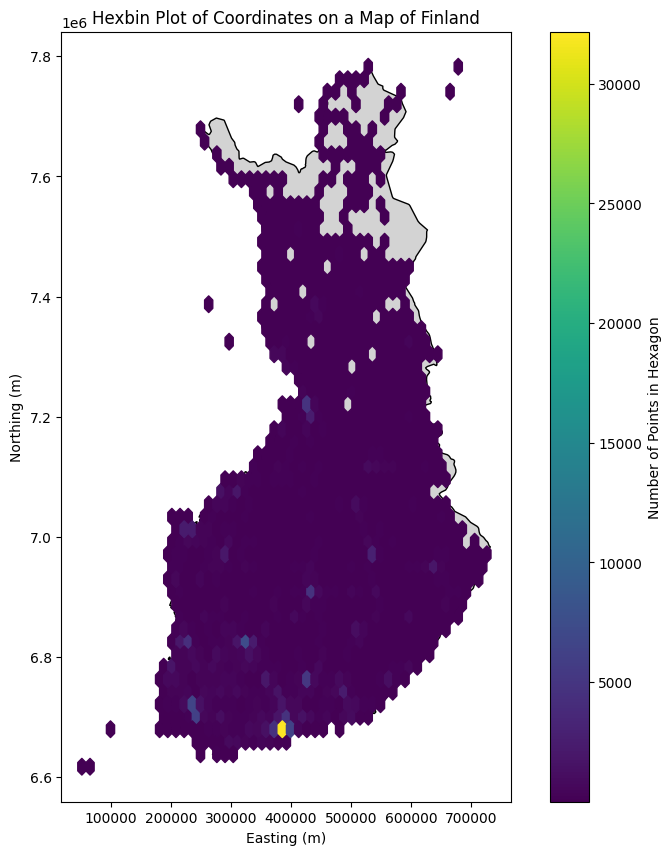

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the world shapefile and filter for Finland
world = gpd.read_file('ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
finland = world[world['ADMIN'] == 'Finland']

# Set the target coordinate reference system
target_crs = 'EPSG:3067'
finland = finland.to_crs(target_crs)

# Create GeoDataFrame from the DataFrame with coordinates
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')
gdf = gdf.to_crs(target_crs)

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
finland.plot(ax=ax, color='lightgray', edgecolor='black')

# Create a hexbin plot
hb = ax.hexbin(gdf.geometry.x, gdf.geometry.y, gridsize=50, cmap='viridis', mincnt=1)

# Add a color bar
cb = fig.colorbar(hb, ax=ax)
cb.set_label('Number of Points in Hexagon')

ax.set_title("Hexbin Plot of Coordinates on a Map of Finland")
ax.set_xlabel("Easting (m)")
ax.set_ylabel("Northing (m)")

plt.show()
